# Variance Exploration

### Goal

To engineer a pixel-level feature which will capture motion to further distinguish and localize cilia. Since cilia are relatively mobile in the videos, a higher variance of pixel values should denote higher likelihood that a pixel is cilia instead of background or cell mass.

### Theory

The idea of pixelwise variance is based in a view of each pixel as a single fluctuating time series data point. For each set pixel's set of grey levels over the set of frames, the variance is calculated resulting in a new 'image' with values being the variance of each pixel in the video

### Process

First the 3d matrix of the video is reshaped into a 2d matrix where each column is a frame and each row is a pixel. The numpy variance function is then applied on the frame axis, which then returns an array of variances for each pixel. This is then returned to the orginal video's spatial dimensions

#### Basic imports

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import imageio

In [2]:
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

#### Data Loads
Loading the example data files and showing the first frames and their maps

In [3]:
vid_1 = np.load("./data/0b599d0670fcbafcaa8ed5567c0f4b10b959e6e49eed157be700bc62cffd1876.npy")
mask_1 = imageio.imread("data/project2_masks_0b599d0670fcbafcaa8ed5567c0f4b10b959e6e49eed157be700bc62cffd1876.png")
vid_2 = np.load("./data/4f421f6a3b7aa1903d6267a4a1948a3f5fb5692da012754d9d1f4caf7c0e7de5.npy")
mask_2 = imageio.imread("data/project2_masks_4f421f6a3b7aa1903d6267a4a1948a3f5fb5692da012754d9d1f4caf7c0e7de5.png")

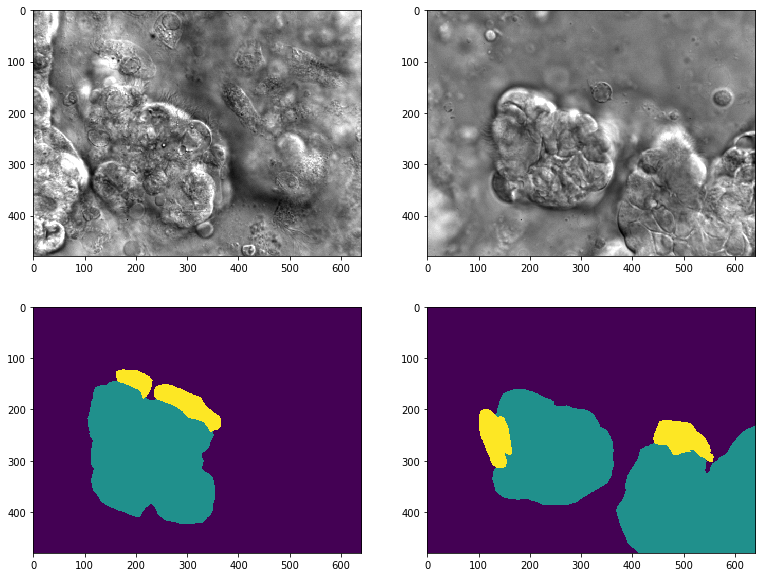

In [4]:
plt.subplot(2, 3, 1)
plt.imshow(vid_1[0],cmap='gray')


plt.subplot(2, 3, 2)
plt.imshow(vid_2[0], cmap='gray')

plt.subplot(2, 3, 4)
plt.imshow(mask_1)


plt.subplot(2, 3, 5)
plt.imshow(mask_2)


plt.show()

#### Define methods and compute variance
first video_to_matrix which converts 3d video to 2d matrix
second get_variances of vid which creates a variance matrix of pixel wise variances

In [5]:
def video_to_matrix(vid):
    vid = np.swapaxes(vid, 0, 2)
    vid = np.swapaxes(vid, 0, 1)
    n_pixels = vid.shape[0] * vid.shape[1]
    n_frames = vid.shape[2]
    matrix = vid.reshape((n_pixels, n_frames))
    return matrix


def get_variances_of_vid(vid):
    matrix = video_to_matrix(vid)
    variances = np.var(matrix, axis=1)
    var_im = variances.reshape((vid.shape[1],vid.shape[2]))
    return var_im

In [6]:
var_im_1 = get_variances_of_vid(vid_1)
var_im_2 = get_variances_of_vid(vid_2)

#### Show results
show heatmaps of variance along with the ground truth maps

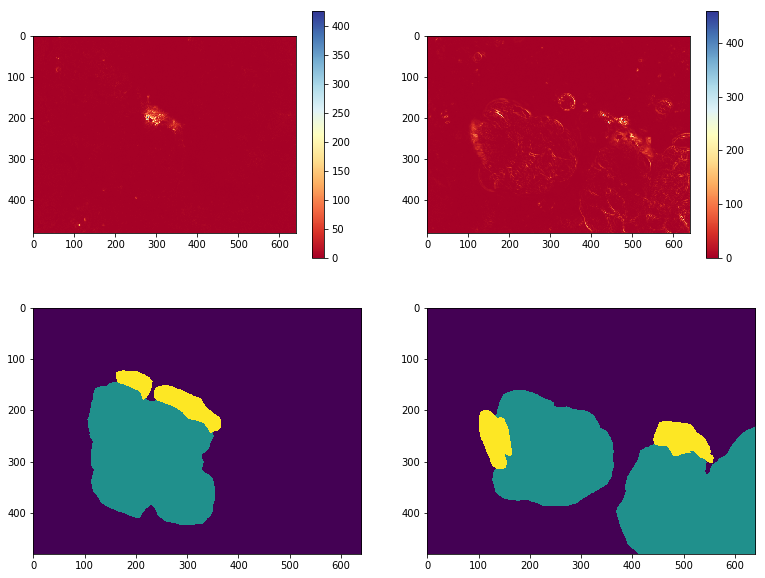

In [7]:
plt.subplot(2, 3, 1)
plt.imshow(var_im_1,cmap='RdYlBu')
plt.colorbar()


plt.subplot(2, 3, 2)
plt.imshow(var_im_2, cmap='RdYlBu')
plt.colorbar()

plt.subplot(2, 3, 4)
plt.imshow(mask_1)


plt.subplot(2, 3, 5)
plt.imshow(mask_2)


plt.show()

### Conclusion

We see a general correlation between the variance and the masks. However, in the case of the first video much of the cilia is fairly stagnant and has a low variance. In the case of the second video much of the cell body has high variance along it's edges which is similat to the portions of the video containing cilia